In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/computers.csv')

In [ ]:
data.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [ ]:
data.shape

(14, 2)

regression technique take dependent value as minutes and dependent value as units.in regression we go for identifying error instead of accuracy. check mean for minutes.

In [ ]:
mean_value=data['Minutes'].mean()

In [ ]:
print(mean_value)

97.21428571428571


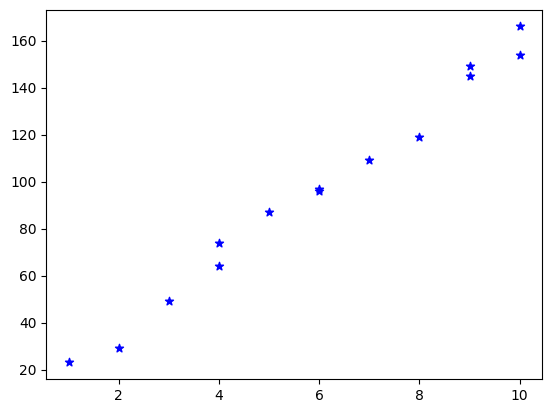

In [ ]:
plt.scatter(data['Units'],data['Minutes'],color='blue',marker='*')

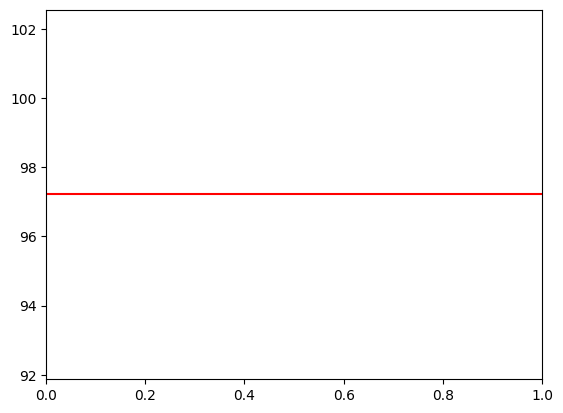

In [ ]:
plt.axhline(y=mean_value,color='red')

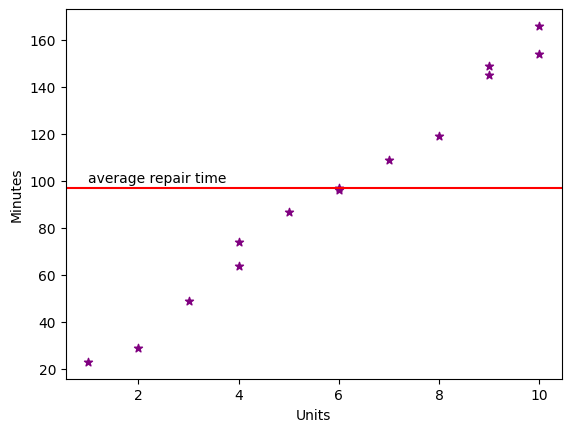

In [ ]:
plt.scatter(data['Units'],data['Minutes'],color='purple',marker='*')
plt.axhline(y=mean_value,color='red')

plt.annotate("average repair time", xy=(1,mean_value + 2.5))
plt.xlabel("Units")
plt.ylabel("Minutes")
plt.plot()
plt.show()

In [ ]:
min_model1=data['Minutes'].mean()
min_model2=10+12*data['Units']
min_model3=6+18*data['Units']

In [ ]:
print(min_model1)
print(min_model2)
print(min_model3)


97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [ ]:
print(data)

    Units  Minutes
0       1       23
1       2       29
2       3       49
3       4       64
4       4       74
5       5       87
6       6       96
7       6       97
8       7      109
9       8      119
10      9      149
11      9      145
12     10      154
13     10      166


In [ ]:
data['min_model1']=min_model1
data['min_model2']=min_model2
data['min_model3']=min_model3
data

,Units,Minutes,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


<bound method Axes.legend of <Axes: title={'center': 'speculated models'}, xlabel='Units', ylabel='Minutes'>>

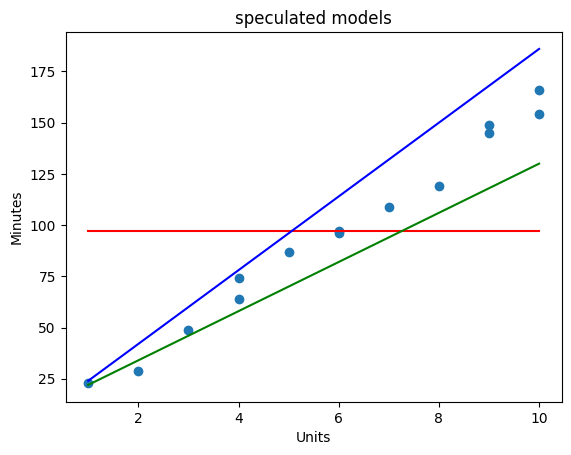

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data,label='Actual Repair Time')
ax.plot(data['Units'],data['min_model1'],color='red',label='Model_1')
ax.plot(data['Units'],data['min_model2'],color='green',label='Model_2')
ax.plot(data['Units'],data['min_model3'],color='blue',label='Model_3')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title("speculated models")
ax.legend

In [ ]:
model1_obs=pd.DataFrame({'Units':data['Units'],
                        'actual time':data['Minutes'],
                        'predicted time':data['min_model1'],
                        'error':(data.min_model1-data.Minutes)})
model1_obs

,Units,actual time,predicted time,error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [ ]:
model2_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual_Time':data['Minutes'],
                         'Predicted Time':data['min_model2'],
                         'error':(data.min_model2-data.Minutes)})
model2_obs

,Units,Actual_Time,Predicted Time,error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [ ]:
model3_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual_Time':data['Minutes'],
                         'Predicted Time':data['min_model3'],
                         'error':(data.min_model3-data.Minutes)})
model3_obs

,Units,Actual_Time,Predicted Time,error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


errors analyzing

In [ ]:
sum(model1_obs['error']**2)

27768.357142857145

In [ ]:
sum(model2_obs['error']**2)

4993

In [ ]:
sum(model3_obs['error']**2)

5001

In [ ]:
x=data.Units
y=data.Minutes
xy=x*y
n=len(data)
xmean=data.Units.mean()
ymean=data.Minutes.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept -c:',c,'coefficient-m:',m)


intercept -c: 4.161654135338296 coefficient-m: 15.508771929824569


In [ ]:
min_best_fit_model=c+m*data.Units
data['min_best_fit_model']=min_best_fit_model
data[['Units','Minutes','min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best Fit Model Line')

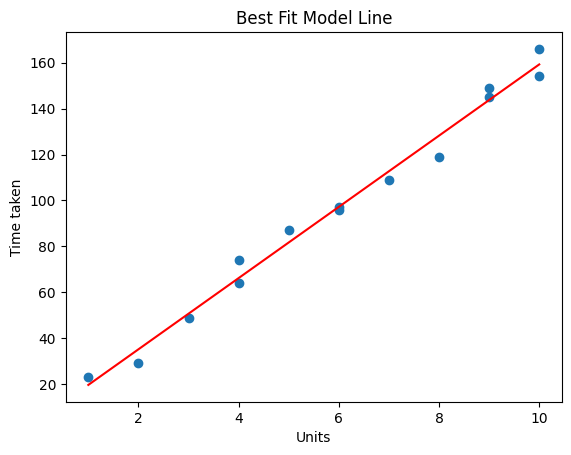

In [ ]:
fig, ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data, label='Actual Time Taken')

ax.plot(data['Units'],data['min_best_fit_model'],color='red', label='Best Fit Model')
ax.set_xlabel('Units')
ax.set_ylabel('Time taken')
ax.set_title('Best Fit Model Line')

In [ ]:
model_best_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual_Time':data['Minutes'],
                         'Predicted Time':data['min_best_fit_model'],
                         'Error':(data.Minutes-data.min_best_fit_model)})
model_best_obs

,Units,Actual_Time,Predicted Time,Error
0,1,23,19.670426,3.329574
1,2,29,35.179198,-6.179198
2,3,49,50.687970,-1.687970
3,4,64,66.196742,-2.196742
4,4,74,66.196742,7.803258
5,5,87,81.705514,5.294486
6,6,96,97.214286,-1.214286
7,6,97,97.214286,-0.214286
8,7,109,112.723058,-3.723058
9,8,119,128.231830,-9.231830


In [ ]:
sum(model_best_obs.Error**2)

348.848370927318

In [ ]:
x=data[['Units']]

In [ ]:
y=data['Minutes']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
print("intercept:",model.intercept_)
print('coefficients:',model.coef_)


intercept: 4.161654135338296
coefficients: [15.50877193]


In [ ]:
SST=sum((data.Minutes-data.Minutes.mean())**2)
SST

27768.357142857145

In [ ]:
SSE=sum(model_best_obs.Error**2)
SSE

348.848370927318

In [ ]:
SSR=SST-SSE
SSR

27419.508771929828

In [ ]:
Rsq=SSR/SST

In [ ]:
Rsq1=model.score(data[['Units']],y)
Rsq1

0.9874371980620736